In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
query_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Query Date: ", query_date)

Query Date:  ('2017-08-23',)


In [33]:
# Calculate the date 1 year ago from the last data point in the database
last_year = dt.date(2017, 8, 23)- dt.timedelta(days=365)
print("One Year Ago: ", last_year)

One Year Ago:  2016-08-23


In [91]:
# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_year).\
    order_by(Measurement.date).all()

In [92]:
# Save the query results as a Pandas DataFrame
precip_data_df = pd.DataFrame(precip_data)
precip_data_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [93]:
# Set the index to the date column
precip_data_df.set_index('date').head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


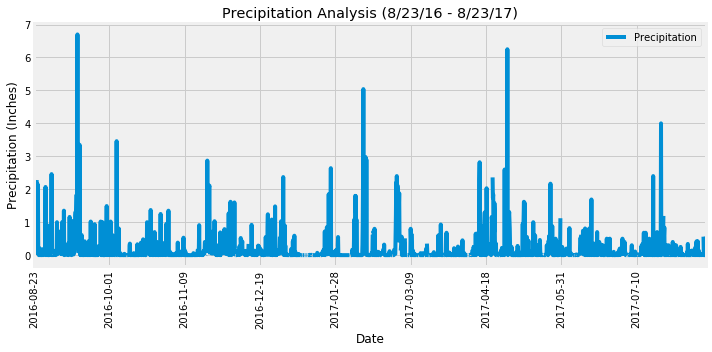

In [104]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_data_df.plot('date', 'prcp', figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.title("Precipitation Analysis (8/23/16 - 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [105]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [116]:
# Design a query to show how many stations are available in this dataset?
query_station = session.query(Station).group_by(Station).count()

print(f"There are {query_station} stations available in this dataset.")

There are 9 stations available in this dataset.


In [131]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
most_active = stations[0][0]
most_active_count = stations[0][1]
print(f"List of the stations and observation counts in descending order: ")

stations


List of the stations and observation counts in descending order: 


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [132]:
print(f"The most active station is {most_active} with {most_active_count} observations.")

The most active station is USC00519281 with 2772 observations.


In [168]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_query = session.query(Measurement.station,func.min(Measurement.tobs), func.max(Measurement.tobs),\
                           func.avg(Measurement.tobs))\
                            .filter(Measurement.station == most_active).all()
temp_query

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [169]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
temp_results = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active).\
    filter(Measurement.date >= last_year).\
    order_by(Measurement.date).all()

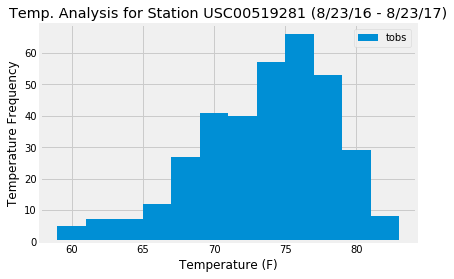

In [174]:
# Plot the results as a histogram with bins=12.
temp_df = pd.DataFrame(temp_results)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Temperature (F)")
plt.ylabel("Temperature Frequency")
plt.title("Temp. Analysis for Station " + most_active + " (8/23/16 - 8/23/17)")
plt.legend(["tobs"])
plt.show()

## Bonus Challenge Assignment (Optional)

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [22]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [23]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [24]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [25]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [27]:
# Plot the daily normals as an area plot with `stacked=False`
